# Exploratory Analysis
### The following code is for exploratory analysis of Capital Metro Austin vehicle location data.

In [1]:
# import useful libraries
import os
import glob
from datetime import datetime
import numpy as np
import pandas as pd
import warnings

In [2]:
# Pull data from csv files

path = r'../00_Source_Data/Capital_Metro/Vehicle_Location_History' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []

with warnings.catch_warnings():
    warnings.simplefilter('ignore') # ignore dataframe generation warnings
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        li.append(df)
        
frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame.columns

Index(['blockassignmentinfo', 'blockid', 'blockmthd', 'directionid',
       'distancealongstoppath', 'driver', 'gtfsstopsequence', 'heading',
       'headsign', 'headwaysecs', 'id', 'ispredictable', 'lat', 'lon',
       'nextstopid', 'nextstopname', 'previousvehicleid',
       'previousvehicleschadhsecs', 'previousvehicleschadhstr', 'routeid',
       'routename', 'routeshortname', 'schadhsecs', 'schadhstr',
       'scheduledheadwaysecs', 'servicedate', 'serviceid', 'servicename',
       'speed', 'stoppathindex', 'timecentral', 'timestamp', 'timeutc',
       'tripid', 'trippattern', 'vehicletype', 'year', 'month', '_Start_Date',
       '_End_Date'],
      dtype='object')

In [4]:
frame[['nextstopname']].value_counts()

nextstopname                     
200 Turk/Cullen                      45947
ACC Riverside  @ Grove               44566
Tech Ridge Bay I                     40809
6502 Bluff Springs/William Cannon    36918
Westgate Transit Center - A          35753
                                     ...  
Seminary Ridge/Sweet Clover              5
Fenton/Red Willow                        2
Curlew/Guidepost                         2
Park/Crestview Jonestown                 2
Cullen/Slaughter                         1
Length: 2319, dtype: int64

Not sure if these service ids are unique to the vehicle. \
There is some confusion about 4-153_MRG_1 and 4-153_MRG_3 as these may be the same bus.\
Would need to clarify definitions with Michael Long.

In [5]:
frame[['routeshortname']].value_counts()

routeshortname
801.0             324229
10.0              275967
803.0             263498
7.0               239905
20.0              229785
                   ...  
491.0               1976
493.0               1157
490.0               1087
214.0                372
990.0                184
Length: 76, dtype: int64

In [6]:
print(frame[['previousvehicleschadhsecs']].max()[0],',', frame[['previousvehicleschadhsecs']].min()[0])

5387.0 , -14412.0


In [7]:
print(frame[['scheduledheadwaysecs']].max()[0],',', frame[['scheduledheadwaysecs']].min()[0])

57840.0 , 12.0


In [8]:
frame[['timecentral']].head()

,timecentral
0,20220619000023
1,20220619000003
2,20220619000016
3,20220619000048
4,20220619000043


In [9]:
frame[['routename', 'routeid', 'routeshortname']].value_counts()

routename                  routeid  routeshortname
801 - N Lamar S Congress   801.0    801.0             324229
10 - South 1st/Red River   10.0     10.0              275967
803 - Burnet/S Lamar       803.0    803.0             263498
7 - Duval / Dove Springs   7.0      7.0               239905
20 - Manor Rd/Riverside    20.0     20.0              229785
                                                       ...  
491 - Allandale            491.0    491.0               1976
493 - Eastview             493.0    493.0               1157
490 - HEB Shuttle          490.0    490.0               1087
214 - Northwest Feeder     214.0    214.0                372
990 - Manor/Elgin Express  990.0    990.0                184
Length: 76, dtype: int64

In [11]:
frame['nextstopid'].value_counts()

5263.0    45947
6439.0    44566
5304.0    40809
5377.0    36918
6373.0    35753
          ...  
4457.0        5
2657.0        2
4462.0        2
2823.0        2
5378.0        1
Name: nextstopid, Length: 2346, dtype: int64

## EDA Visuals

In [12]:
import matplotlib.pyplot as plt

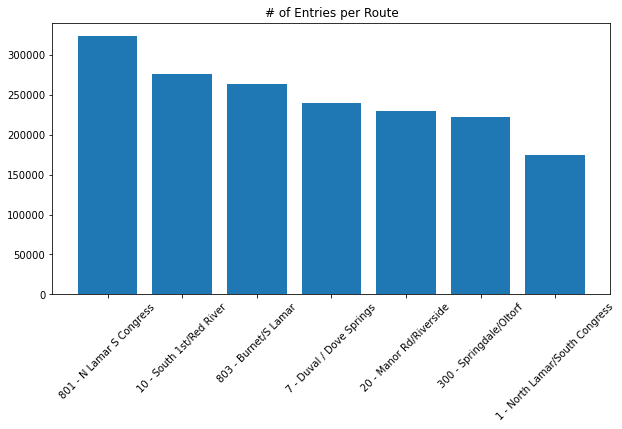

In [23]:
f,ax = plt.subplots(figsize=(10,5))

ax.bar(frame['routename'].value_counts().head(7).index,frame['routename'].value_counts().head(7), label="# Entries")
plt.xticks(rotation = 45)
plt.title("# of Entries per Route");

In [25]:
# Save figure
f.savefig("../Presentation/Visuals/Entries_by_Route.png", bbox_inches='tight', dpi = 300, transparent=True)
f.clf();

In [66]:
gap_df = frame[frame['routeid'].isin([801,803,10,7,20])][['routeid','headwaysecs', 'scheduledheadwaysecs', 'timecentral']]
gap_df['gap'] = abs(gap_df['headwaysecs'] - gap_df['scheduledheadwaysecs'])

gap_df['timecentral'] = pd.to_datetime(gap_df['timecentral'], format='%Y%m%d%H%M%S').dt.floor('H')

In [67]:
gap_df

,routeid,headwaysecs,scheduledheadwaysecs,timecentral,gap
239,7.0,1419.6,1800.0,2022-06-19 00:00:00,380.4
240,7.0,1816.8,1800.0,2022-06-19 00:00:00,16.8
241,7.0,1808.8,1800.0,2022-06-19 00:00:00,8.8
242,7.0,1417.6,1800.0,2022-06-19 00:00:00,382.4
243,7.0,1806.7,1800.0,2022-06-19 00:00:00,6.7
...,...,...,...,...,...
6214214,803.0,481.3,420.0,2022-06-25 18:00:00,61.3
6214215,803.0,477.0,420.0,2022-06-25 18:00:00,57.0
6214216,803.0,463.6,420.0,2022-06-25 18:00:00,43.6
6214217,803.0,228.8,420.0,2022-06-25 18:00:00,191.2


In [68]:
routes = gap_df['routeid'].unique().tolist()

In [69]:
routes

[7.0, 10.0, 20.0, 801.0, 803.0]

In [70]:
stat_list = ['count','min','max','mean','std','median','mad']

stats = {}

with warnings.catch_warnings():
    warnings.simplefilter('ignore') # ignore dataframe generation warnings
    for route in routes:
        stats[route] = gap_df[gap_df['routeid']==route].groupby('timecentral').agg(stat_list)['gap']
    
stats

{7.0:                      count    min     max        mean         std  median  \
 timecentral                                                                 
 2022-06-19 00:00:00    145    4.1  1609.8  422.560690  303.973697  394.80   
 2022-06-19 05:00:00     13  174.2   174.2  174.200000    0.000000  174.20   
 2022-06-19 06:00:00    827    0.0  1620.7  206.665417  323.248679  122.60   
 2022-06-19 07:00:00   1859    0.1  1568.5  222.286444  221.296921  168.80   
 2022-06-19 08:00:00   2128    0.2   993.7  178.321006  150.909982  142.30   
 ...                    ...    ...     ...         ...         ...     ...   
 2022-06-25 19:00:00   1710    0.1  1660.2  277.299240  338.083526  139.10   
 2022-06-25 20:00:00   1090    0.6  1461.3  385.034404  398.836310  203.05   
 2022-06-25 21:00:00   1014    0.3   579.4  209.038757  122.477715  188.20   
 2022-06-25 22:00:00    992    0.1  2287.0  180.147984  208.080922  144.80   
 2022-06-25 23:00:00    667    0.6  1980.8  475.134783  576

In [73]:
for route in routes:
    plot_df = stats.get(route)
    print(f"Plotting Statistics for Route {route}")

    f,ax = plt.subplots(figsize=(10,5))

    for stat in stat_list:
        ax.plot(plot_df.index, plot_df[stat], label=stat)

    ax.fill_between(plot_df.index, plot_df['mean'] - plot_df['std'], plot_df['mean'] + plot_df['std'], \
                    color='lightgrey', label='1-std')

    title = f'Route {str(route)}: Gap Statistics \n{plot_df.index.min().date()} to {plot_df.index.max().date()}'

    ax.set_title(title)
    ax.set_xlabel('Time')
    ax.set_ylabel('Headway Gap')
    ax.grid()
    ax.legend()
    ax.set_ylim(bottom=0)
    
    # Save figure
    f.savefig(f"../Presentation/Visuals/" + str(route) +"_route_stats.png", bbox_inches='tight', dpi = 300, transparent=True)
    f.clf();

Plotting Statistics for Route 7.0
Plotting Statistics for Route 10.0
Plotting Statistics for Route 20.0
Plotting Statistics for Route 801.0
Plotting Statistics for Route 803.0


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [80]:
nroute= 7

plot_df = stats.get(nroute)
f,ax = plt.subplots(figsize=(10,5))

for stat in stat_list:
    ax.plot(plot_df.index, plot_df[stat], label=stat)

ax.fill_between(plot_df.index, plot_df['mean'] - plot_df['std'], plot_df['mean'] + plot_df['std'], \
                color='lightgrey', label='1-std')

title = f'Route {str(nroute)}: Gap Statistics \n{plot_df.index.min().date()} to {plot_df.index.max().date()}'

ax.set_title(title)
ax.set_xlabel('Time')
ax.set_ylabel('Headway Gap')
ax.grid()
ax.legend()
ax.set_ylim(bottom=0)
    
# Save figure
f.savefig(f"../Presentation/Visuals/" + str(nroute) +"_route_stats.png", bbox_inches='tight', dpi = 300, transparent=True)
f.clf();

<Figure size 720x360 with 0 Axes>